<a href="https://colab.research.google.com/github/yananma/useful_program/blob/master/DL/PyTorch/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Linear Regression

In [0]:
import torch 
import torch.nn as nn 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 

In [0]:
# Hyper parameters 
input_size = 1 
output_size = 1 
num_epochs = 3000 
learning_rate = 0.001 

In [0]:
# data 
x = np.random.rand(256)
noise = np.random.randn(256) / 4 
y = 5 * x + 7 + noise

x_train = x.reshape(-1, 1).astype('float32')
y_train = y.reshape(-1, 1).astype('float32')

In [0]:
# model
model = nn.Linear(input_size, output_size)

In [0]:
# loss and optimizer 
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [0]:
# train 
for epoch in range(num_epochs):
    inputs = torch.from_numpy(x_train)
    targets = torch.from_numpy(y_train)

    # forward pass
    outputs = model(inputs)
    loss = criterion(outputs, targets)

    # backward and oprimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 100 == 0:
        print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

In [7]:
[w, b] = model.parameters()
print(w.item(), b.item())

4.857466697692871 7.0521368980407715


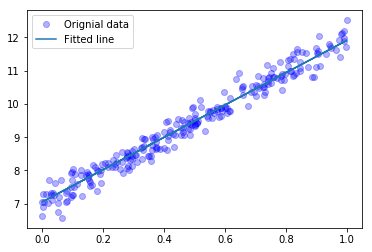

In [8]:
# plot
predicted = model(torch.from_numpy(x_train)).detach().numpy()
plt.plot(x_train, y_train, 'bo', label='Orignial data', alpha=0.3)
plt.plot(x_train, predicted, label='Fitted line')
plt.legend()
plt.show()

In [0]:
# save the model checkpoint
torch.save(model.state_dict(), 'model.ckpt')